MIDTERM | QUIZ 1
--- | ---
Name: | **Feliciano, Kurt Martin**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>

<h4>
<b>Instructions:</b>

Use this provided dataset: PhiUSIIL Phishing URL (Website) - UCI Machine Learning RepositoryLinks to an external site.<br><br>
Perform:<br>
Task 1: Exploratory Data Analysis (Cleaning + Prepping the dataset)<br>
Task 2: Data modelling using ANN

In [2]:
# necessary procedure to fetch the dataset
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
print(phiusiil_phishing_url_website.variables)


In [21]:
# checking for missing data is no longer needed, as the page
# already claims it doesn't have any.

# check datatype for preprocessing
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [ ]:
X = X.drop("URL", axis = 1)

In [25]:
X = X.drop("Domain", axis = 1)
X = X.drop("TLD", axis = 1)
X = X.drop("Title", axis = 1)

In [27]:
# verify if the object columns have been dropped
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

In [29]:
print(X.dtypes)

URLLength                       int64
DomainLength                    int64
IsDomainIP                      int64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineLength               int64
HasTitle                        int64
DomainTitleMatchScore         float64
URLTitleMatc

In [32]:
# change all floats to ints
X = X.astype({"URLSimilarityIndex": int, "CharContinuationRate": int, "TLDLegitimateProb": int,
              "URLCharProb": int, "ObfuscationRatio": int, "LetterRatioInURL": int,
              "DegitRatioInURL": int, "SpacialCharRatioInURL": int, "DomainTitleMatchScore": int,
              "URLTitleMatchScore": int})

In [33]:
# verify if all datatypes are now int
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   URLLength                   235795 non-null  int64
 1   DomainLength                235795 non-null  int64
 2   IsDomainIP                  235795 non-null  int64
 3   URLSimilarityIndex          235795 non-null  int64
 4   CharContinuationRate        235795 non-null  int64
 5   TLDLegitimateProb           235795 non-null  int64
 6   URLCharProb                 235795 non-null  int64
 7   TLDLength                   235795 non-null  int64
 8   NoOfSubDomain               235795 non-null  int64
 9   HasObfuscation              235795 non-null  int64
 10  NoOfObfuscatedChar          235795 non-null  int64
 11  ObfuscationRatio            235795 non-null  int64
 12  NoOfLettersInURL            235795 non-null  int64
 13  LetterRatioInURL            235795 non-null 

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import matplotlib.pyplot as plt

# classify training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=65)

# standardize features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [71]:
model  = Sequential([
    # Use the "relu" activation function for the hidden layers
    Dense(6, input_shape=(50,), activation="relu"),
    Dense(6, activation='relu'),
    # and "sigmoid" for the final layer
    Dense(1, activation="sigmoid")
])
# Use a learning rate of 0.003
model.compile(SGD(lr = .03), "binary_crossentropy", metrics=["accuracy"])
# and train for 1500 epochs
run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10 ,batch_size=500)

Epoch 1/10
283/283 [==============================] - 2s 4ms/step - loss: 0.4186 - accuracy: 0.8655 - val_loss: 0.2698 - val_accuracy: 0.9579
Epoch 2/10
283/283 [==============================] - 1s 3ms/step - loss: 0.1746 - accuracy: 0.9718 - val_loss: 0.1063 - val_accuracy: 0.9805
Epoch 3/10
283/283 [==============================] - 1s 3ms/step - loss: 0.0761 - accuracy: 0.9837 - val_loss: 0.0571 - val_accuracy: 0.9875
Epoch 4/10
283/283 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9891 - val_loss: 0.0388 - val_accuracy: 0.9909
Epoch 5/10
283/283 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.0291 - val_accuracy: 0.9929
Epoch 6/10
283/283 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9934 - val_loss: 0.0230 - val_accuracy: 0.9942
Epoch 7/10
283/283 [==============================] - 1s 3ms/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.0189 - val_accuracy: 0.9952
Epoch 

In [72]:
y_pred_class_nn_1 = np.argmax(model.predict(X_test_norm), axis=-1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

2948/2948 [==============================] - 4s 1ms/step


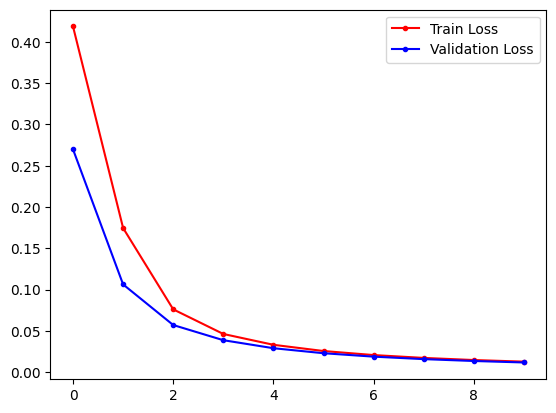

In [75]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [83]:
acc_test = model.evaluate(X_test_norm, y_test, verbose = 1)
print(acc_test)

2948/2948 [==============================] - 8s 3ms/step - loss: 0.0118 - accuracy: 0.9970
[0.01179113332182169, 0.9969571232795715]


<b><h3> Conclusion

After performing this activity, I was able to succesfully integrate the lessons taught in the previous activities onto a new, much larger dataset that simulates how we would apply these lessons in real life. This was a great activity to practice modelling, and knowing other ways to preprocess the data depending on what type of preparation the dataset needs. For this one, I went ahead and dropped the object types and swapped out the floats to ints so that I wouldn't run into data type issues. I went ahead and re-applied the code blocks that are fit for this quiz from my previous activities, which is efficient but not ideal in a real-world setting. I still need to familiarize myself with the different functions and code blocks that were used. Overall, I still think I did a great job of making this quiz work as intended, and I hope to do it more effeciently in the future.